Code for model-driven clustering of moral strategies, by parsimoniously carving up the model's parameter space.

In [2]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import scipy.io

sys.path.append('/project/3014018.02/analysis_mri/'+
                'DataSharingCollection/Code/1.Behavior-FitModels/Functions/')
import choiceModels, costFunctions, penalizedModelFit

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

## Load theta-phi space and simulations

In [3]:
precision = 100

#
decimals = int(np.log10(precision)+1)
phi = np.around(np.arange(-0.1,0.10001,0.2/precision).astype('float'),decimals=decimals)#[-.1,0,.1]
theta = np.around(np.arange(0,.50001,.5/precision).astype('float'),decimals=decimals)#[0,.1,.2,.3,.4,.5,.6]
phiLen = len(phi)
thetaLen = len(theta)

#
thetaPhi = pd.read_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ThetaPhi_%i-by-%i.csv'%(
    thetaLen,phiLen)),index_col=0)
simulations = np.array(pd.read_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ModelSimulations_%i-by-%i.csv'%(
    thetaLen,phiLen)),index_col=0))
print simulations.shape

(10201, 30)


## Settings

In [4]:
metric = 'sqeuclidean'
cluster_threshold = 495 # Cutoff for four clusters

## Cluster

In [5]:
sim_distance = scipy.spatial.distance.pdist(simulations,metric)
Z = linkage(sim_distance,method='average')

clusters = scipy.cluster.hierarchy.fcluster(Z, cluster_threshold, criterion='distance')
print np.unique(clusters)

[1 2 3 4]


In [6]:
# # Dendrogram
# plt.figure(figsize=(25, 10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     Z,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
#     color_threshold=cluster_threshold,
# )
# plt.show()

In [9]:
# Add to thetaphi and store
thetaPhi['cluster'] = clusters.T
thetaPhi.to_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/SimulationClustering_%i-by-%i_%s.csv'%(
    thetaLen,phiLen,metric)))

#### Plot clusters in parameter space

In [10]:
thetaLen = 101
phiLen = 101
metric = 'sqeuclidean'

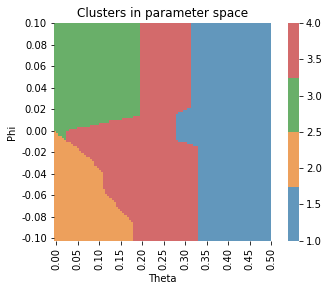

In [11]:
# Add clusters to thetaPhi => easily plot cluster territories over parameter space
thetaPhi = pd.read_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/SimulationClustering_%i-by-%i_%s.csv'%(
    thetaLen,phiLen,metric)),index_col=0)
thetaPhiPivot = thetaPhi.pivot('theta','phi','cluster').T
thetaPhiPivot.to_csv(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterMap_%s-by-%s_%s.csv' % (
    thetaLen,phiLen, metric)))
# Define colors
ncols = len(np.unique(thetaPhi['cluster']))
sns.set_palette('tab10',ncols,desat=.8)
weight_colorsByWhites = [3,1]
colorMap = sns.color_palette()[0:ncols]
colorMap = list(np.add(np.multiply(colorMap,weight_colorsByWhites[0]),
                       np.multiply(np.ones([ncols,3]),weight_colorsByWhites[1]))
                /sum(weight_colorsByWhites))
ax = sns.heatmap(thetaPhiPivot,cmap=colorMap,square=True)
plt.xlabel('Theta')
plt.ylabel('Phi')
plt.yticks(np.arange(1,phiLen+1,(phiLen-1)/10),['%.2f'%i for i in np.arange(-.1,.1001,2/(phiLen-1))])
plt.xticks(np.arange(1,thetaLen+1,(thetaLen-1)/10),['%.2f'%i for i in np.arange(0,.5001,5/(phiLen-1))])
plt.title('Clusters in parameter space')
ax.invert_yaxis()
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterMap_%s-by-%s_%s.eps' % (
    thetaLen,phiLen,metric)),format='eps',dpi=200,bbox_inches='tight')
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterMap_%s-by-%s_%s.png' % (
    thetaLen,phiLen,metric)),format='png',dpi=200,bbox_inches='tight')